In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

import sys
sys.path.append("../")

torch.Size([1000])


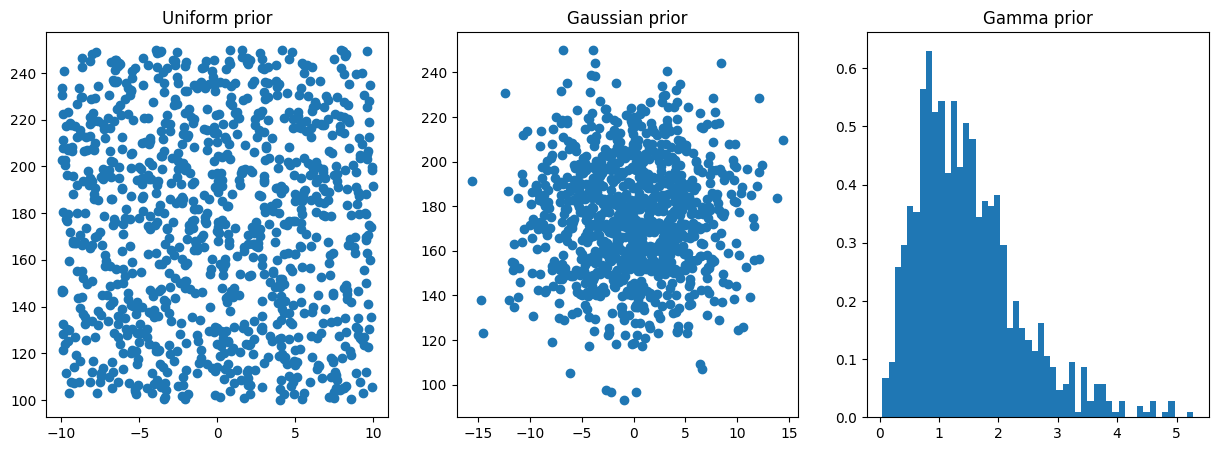

In [2]:
# Prior distributions
from tasks.toy_examples.prior import UniformPrior, GaussianPrior
from tasks.toy_examples.data_generators import Conjugate_GammaPrior

prior_uniform = UniformPrior()
prior_gaussian = GaussianPrior()
prior_gamma = Conjugate_GammaPrior(alpha=3, beta=2).prior

# Plot prior distributions
samples_uniform = prior_uniform.sample((1000,))
samples_gaussian = prior_gaussian.sample((1000,))
samples_gamma = prior_gamma.sample((1000,))
print(samples_gamma.shape)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(samples_uniform[:, 0], samples_uniform[:, 1])
plt.title("Uniform prior")
plt.subplot(132)
plt.scatter(samples_gaussian[:, 0], samples_gaussian[:, 1])
plt.title("Gaussian prior") 
plt.subplot(133)
plt.hist(samples_gamma, bins=50, density=True)
plt.title("Gamma prior")
plt.show()

In [3]:
def euler_sde_sampler_fwd(dist, nsamples, beta, dim=2):
    theta_t = dist.sample((nsamples,))
    print(theta_t.shape)

    time_pts = torch.linspace(0, 1, 1000)  # (ntime_pts,)
    for i in tqdm(range(len(time_pts) - 1)):
        t = time_pts[i]
        dt = time_pts[i + 1] - t

        # calculate the drift and diffusion terms
        f = -0.5 * beta(t) * theta_t
        g = beta(t) ** 0.5

        # euler-maruyama step
        theta_t = theta_t + f * dt + g * torch.randn_like(theta_t) * torch.abs(dt) ** 0.5
        assert not torch.isnan(theta_t).any()
    return theta_t.detach()

torch.Size([1000])


100%|██████████| 999/999 [00:00<00:00, 3549.35it/s]


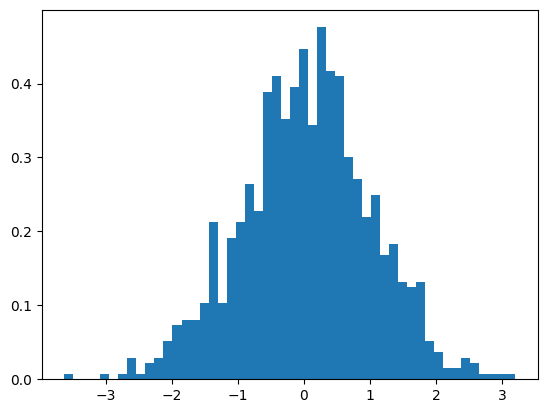

In [4]:
from nse import NSE
nse = NSE(1,1)
samples = euler_sde_sampler_fwd(prior_gamma, 1000, nse.beta, dim=1)
plt.hist(samples, bins=50, density=True)
plt.show()

In [13]:
def euler_sde_sampler(score_fn, nsamples, beta, dim=2):
    if dim > 1:
        theta_t = torch.randn((nsamples, dim)) # (nsamples, 2)
    else:
        theta_t = torch.randn((nsamples,)) + prior_gamma.concentration - 1 #.abs() # (nsamples, 1)
    print(theta_t.shape)
    time_pts = torch.linspace(1, 0, 1000)  # (ntime_pts,)
    for i in tqdm(range(len(time_pts) - 1)):
        t = time_pts[i]
        dt = time_pts[i + 1] - t

        # calculate the drift and diffusion terms
        f = -0.5 * beta(t) * theta_t
        g = beta(t) ** 0.5
        score = score_fn(theta_t, t).detach()

        drift = f - g * g * score
        diffusion = g

        # euler-maruyama step
        theta_t = theta_t + drift * dt + diffusion * torch.randn_like(theta_t) * torch.abs(dt) ** 0.5
        if dim == 1:
            theta_t = theta_t.abs()
            # theta_t = theta_t.clip(0,4)
        # print(theta_t)
        # print()
        assert not torch.isnan(theta_t).any()
    return theta_t.detach()

In [14]:
# Score functions
from nse import NSE
from vp_diffused_priors import get_vpdiff_uniform_score, get_vpdiff_gaussian_score, get_vpdiff_gamma_score

nse = NSE(2,2)
diffused_uniform_prior_score = get_vpdiff_uniform_score(prior_uniform.low, prior_uniform.high, nse)
diffused_gaussian_prior_score = get_vpdiff_gaussian_score(prior_gaussian.prior.loc, prior_gaussian.prior.covariance_matrix, nse)
diffused_gamma_prior_score = get_vpdiff_gamma_score(prior_gamma.concentration, prior_gamma.rate, nse)
print(prior_gamma.concentration, prior_gamma.rate)

tensor(3.) tensor(2.)


In [15]:
samples_uniform_diffused = euler_sde_sampler(diffused_uniform_prior_score, 1000, nse.beta)
samples_gaussian_diffused = euler_sde_sampler(diffused_gaussian_prior_score, 1000, nse.beta)
samples_gamma_diffused = euler_sde_sampler(diffused_gamma_prior_score, 1000, nse.beta, dim=1)

torch.Size([1000, 2])


  0%|          | 0/999 [00:00<?, ?it/s]

100%|██████████| 999/999 [00:00<00:00, 1304.21it/s]


torch.Size([1000, 2])


100%|██████████| 999/999 [00:00<00:00, 2518.37it/s]


torch.Size([1000])


  9%|▊         | 86/999 [00:00<00:01, 854.39it/s]

M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t 

 17%|█▋        | 174/999 [00:00<00:00, 867.19it/s]

M_t is zero
M_t is zero


 26%|██▋       | 264/999 [00:00<00:00, 877.27it/s]

M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t 

 35%|███▌      | 353/999 [00:00<00:00, 880.93it/s]

M_t is zero
M_t is zero


 44%|████▍     | 442/999 [00:00<00:00, 866.23it/s]

M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t is zero
M_t 

 63%|██████▎   | 631/999 [00:00<00:00, 911.58it/s]

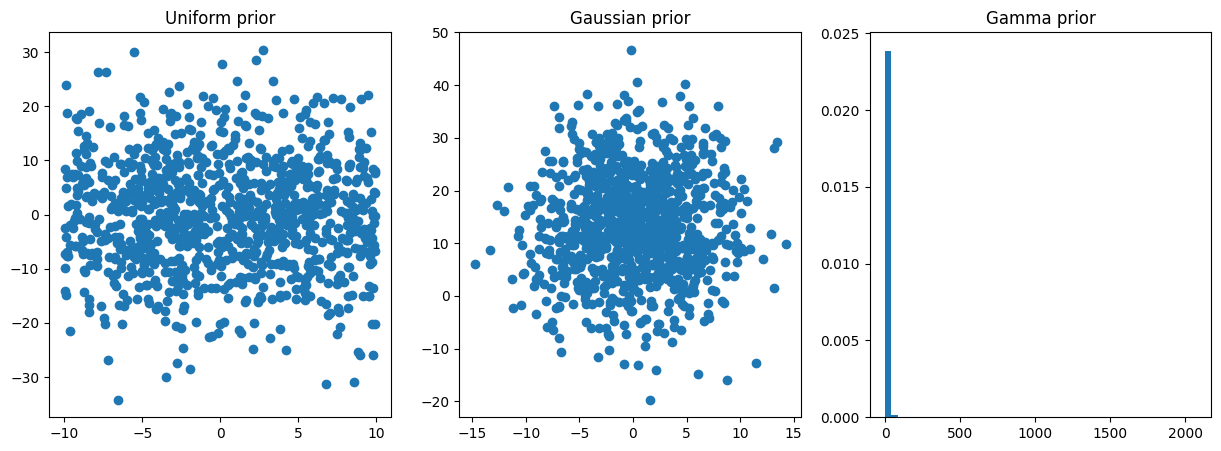

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(samples_uniform_diffused[:, 0], samples_uniform_diffused[:, 1])
plt.title("Uniform prior")
plt.subplot(132)
plt.scatter(samples_gaussian_diffused[:, 0], samples_gaussian_diffused[:, 1])
plt.title("Gaussian prior")
plt.subplot(133)
plt.hist(samples_gamma_diffused, bins=50, density=True)
plt.title("Gamma prior")
plt.show()


In [9]:
from tasks.sbibm.data_generators import get_task
task = get_task("sir")
prior = task.get_prior()

print(task.prior_dist.base_dist.loc)

samples = prior(1000)

# plt.scatter(samples[:, 0], samples[:, 1])
# plt.show()

transformed_samples = torch.log(samples)
print(transformed_samples.mean(0), samples.mean(0))
# transformed_samples_norm = (transformed_samples - transformed_samples.mean(0)) / transformed_samples.std(0)

# plt.scatter(transformed_samples_norm[:, 0], transformed_samples_norm[:, 1])
# plt.show()

ModuleNotFoundError: No module named 'tasks.sbibm.data_generators'

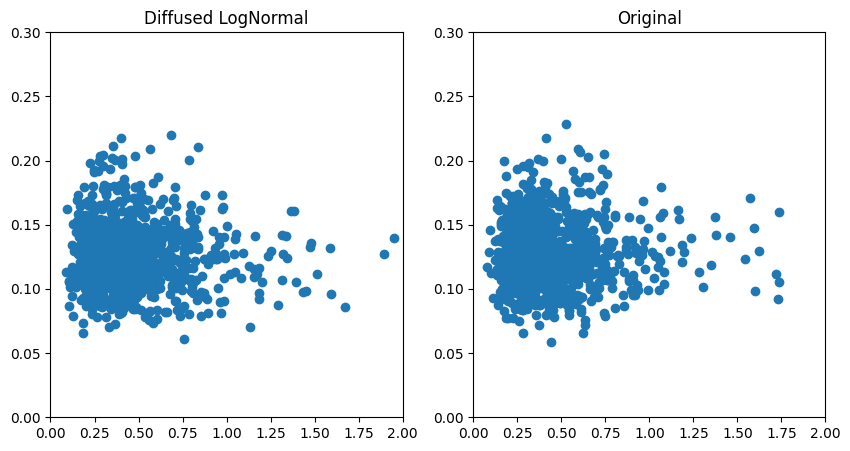

In [8]:
from tasks.sbibm.data_generators import get_task
task = get_task("sir")
prior = task.get_prior()

samples = prior(1000)
transformed_samples = torch.log(samples)
# samples_gauss = torch.distributions.Normal(task.prior_dist.base_dist.loc, task.prior_dist.base_dist.scale).sample((1000,))

loc = (task.prior_dist.base_dist.loc - transformed_samples.mean(0)) / transformed_samples.std(0)
cov = torch.diag(1 / transformed_samples.std(0)) @ torch.diag_embed(task.prior_dist.base_dist.scale.square()) @ torch.diag(1 / transformed_samples.std(0))

# samples_norm = torch.distributions.MultivariateNormal(loc, cov).sample((1000,))
# transformed_samples_norm = (transformed_samples - transformed_samples.mean(0)) / transformed_samples.std(0)

diffused_prior_score = get_vpdiff_gaussian_score(loc, cov, nse)

samples_lognormal_diffused = euler_sde_sampler(diffused_prior_score, 1000, nse.beta)
samples_lognormal_diffused = torch.exp(samples_lognormal_diffused * transformed_samples.std(0) + transformed_samples.mean(0))

# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax[0].scatter(transformed_samples[:, 0], transformed_samples[:, 1])
# ax[0].set_title("Log(X), X ~ LogNormal(m, s)")
# ax[1].scatter(samples_gauss[:, 0], samples_gauss[:, 1])
# ax[1].set_title("N(m, s)")
# plt.show()

# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax[0].scatter(transformed_samples_norm[:, 0], transformed_samples_norm[:, 1])
# ax[0].set_title("Log(X), X ~ LogNormal(0, 1)")
# ax[1].scatter(samples_norm[:, 0], samples_norm[:, 1])
# ax[1].set_title("N(0, 1)")
# plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(samples_lognormal_diffused[:, 0], samples_lognormal_diffused[:, 1])
ax[0].set_title("Diffused LogNormal")
ax[0].set_xlim(0, 2)
ax[0].set_ylim(0, 0.3)
ax[1].scatter(samples[:, 0], samples[:, 1])
ax[1].set_title("Original")
ax[1].set_xlim(0, 2)
ax[1].set_ylim(0, 0.3)
plt.show()

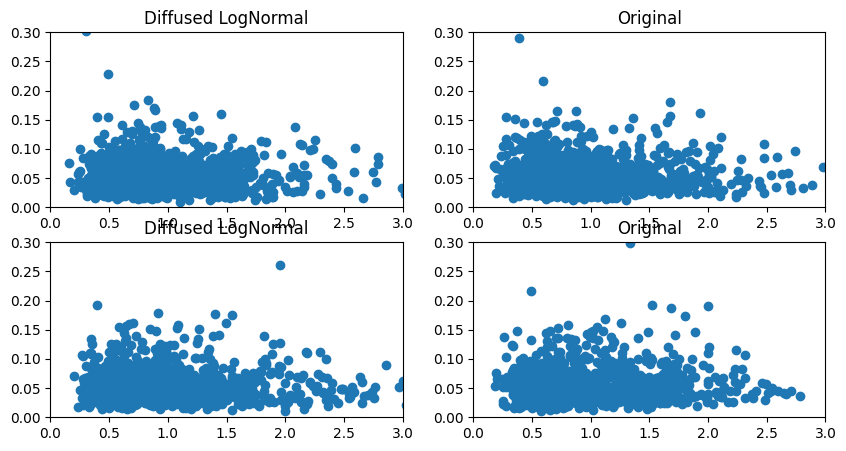

In [9]:
from tasks.sbibm.data_generators import get_task
task = get_task("lotka_volterra")
prior = task.get_prior()

samples = prior(1000)
transformed_samples = torch.log(samples)

loc = (task.prior_dist.base_dist.loc - transformed_samples.mean(0)) / transformed_samples.std(0)
cov = torch.diag(1 / transformed_samples.std(0)) @ torch.diag_embed(task.prior_dist.base_dist.scale.square()) @ torch.diag(1 / transformed_samples.std(0))

diffused_prior_score = get_vpdiff_gaussian_score(loc, cov, nse)

samples_lognormal_diffused = euler_sde_sampler(diffused_prior_score, 1000, nse.beta, dim=4)
samples_lognormal_diffused = torch.exp(samples_lognormal_diffused * transformed_samples.std(0) + transformed_samples.mean(0))

fig, ax = plt.subplots(2, 2, figsize=(10, 5))
ax[0, 0].scatter(samples_lognormal_diffused[:, 0], samples_lognormal_diffused[:, 1])
ax[0, 0].set_title("Diffused LogNormal")
ax[0, 0].set_xlim(0, 3)
ax[0, 0].set_ylim(0, 0.3)
ax[0, 1].scatter(samples[:, 0], samples[:, 1])
ax[0, 1].set_title("Original")
ax[0, 1].set_xlim(0, 3)
ax[0, 1].set_ylim(0, 0.3)
ax[1, 0].scatter(samples_lognormal_diffused[:, 2], samples_lognormal_diffused[:, 3])
ax[1, 0].set_title("Diffused LogNormal")
ax[1, 0].set_xlim(0, 3)
ax[1, 0].set_ylim(0, 0.3)
ax[1, 1].scatter(samples[:, 2], samples[:, 3])
ax[1, 1].set_title("Original")
ax[1, 1].set_xlim(0, 3)
ax[1, 1].set_ylim(0, 0.3)
plt.show()

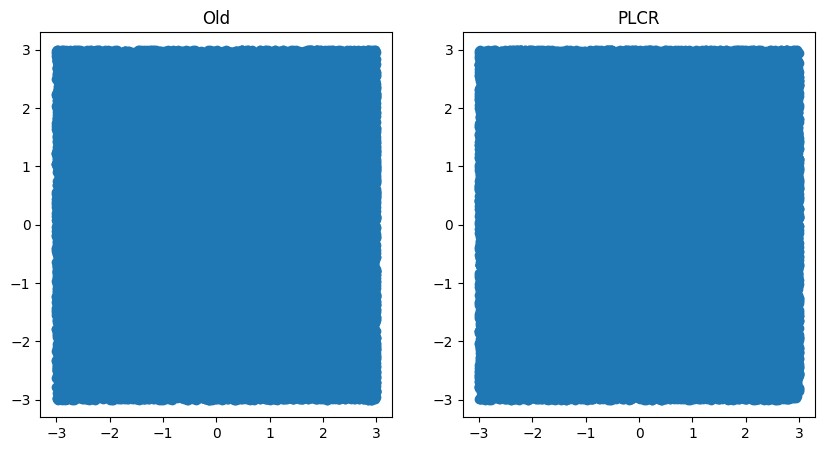

In [14]:
data = torch.load('/data/parietal/store3/work/jlinhart/git_repos/diffusions-for-sbi/results/sbibm/slcp_good/dataset_n_train_50000.pkl')
data_old = torch.load('/data/parietal/store3/work/jlinhart/git_repos/diffusions-for-sbi/results/sbibm/slcp/dataset_n_train_50000.pkl')
theta_train_old = data_old['theta']
x_train_old = data_old['x']
theta_train = data['theta']
x_train = data['x']

# theta_train = torch.log(theta_train)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(theta_train_old[:, 0], theta_train_old[:, 1])
ax[0].set_title("Old")
ax[1].scatter(theta_train[:, 0], theta_train[:, 1])
ax[1].set_title("PLCR")
plt.show()

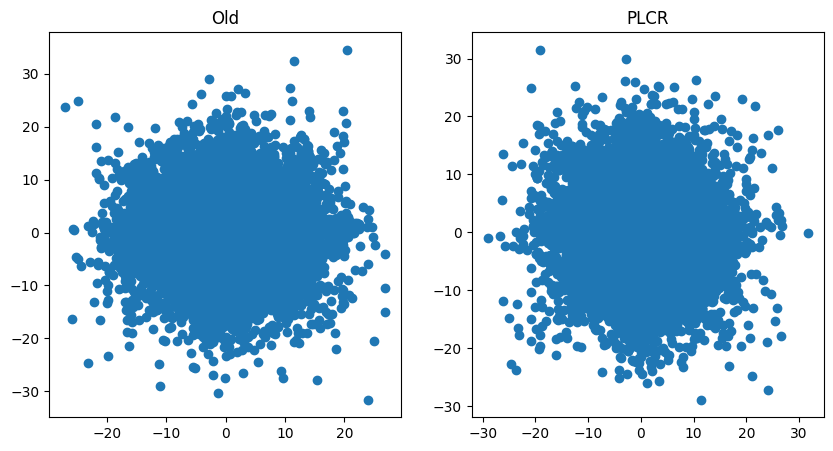

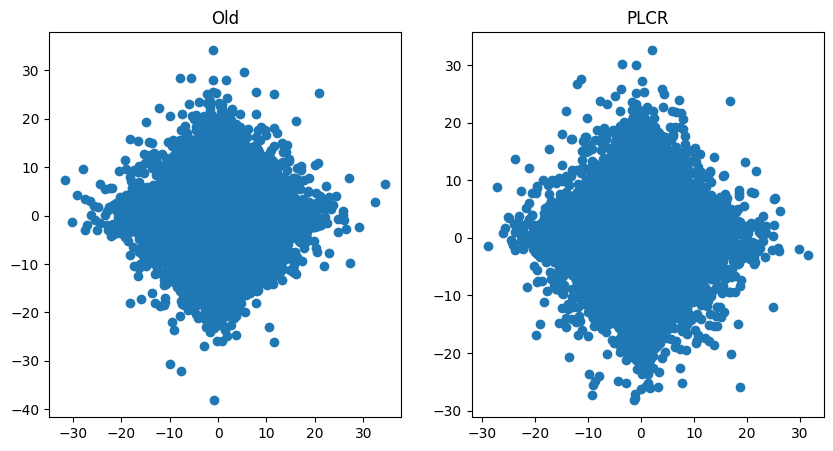

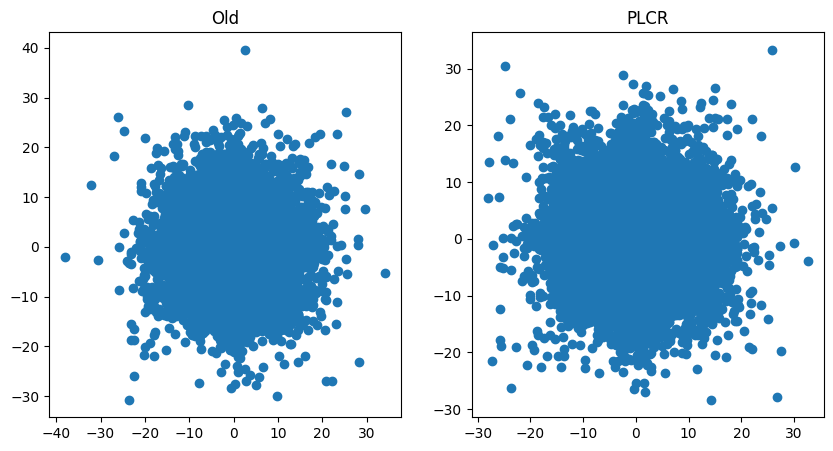

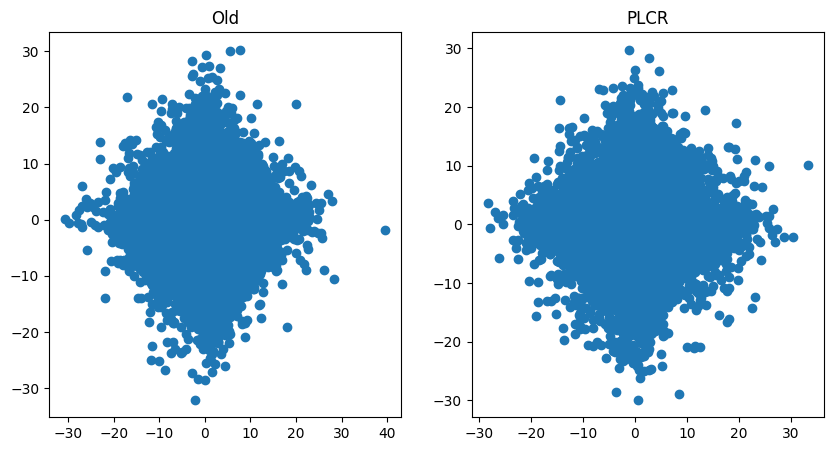

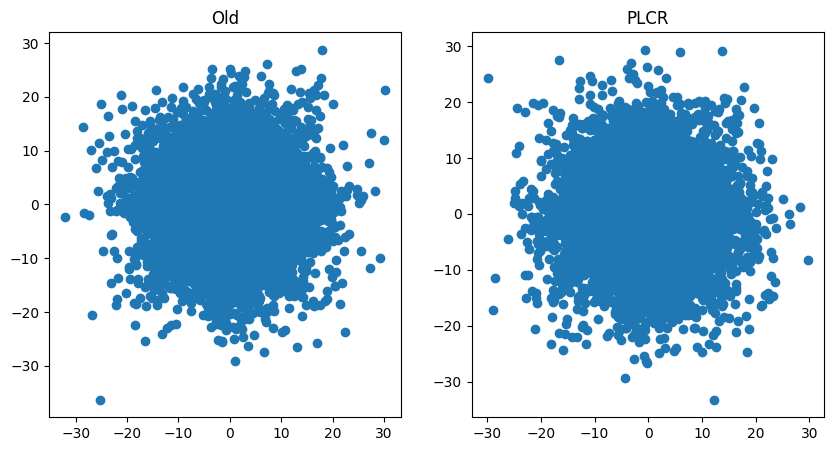

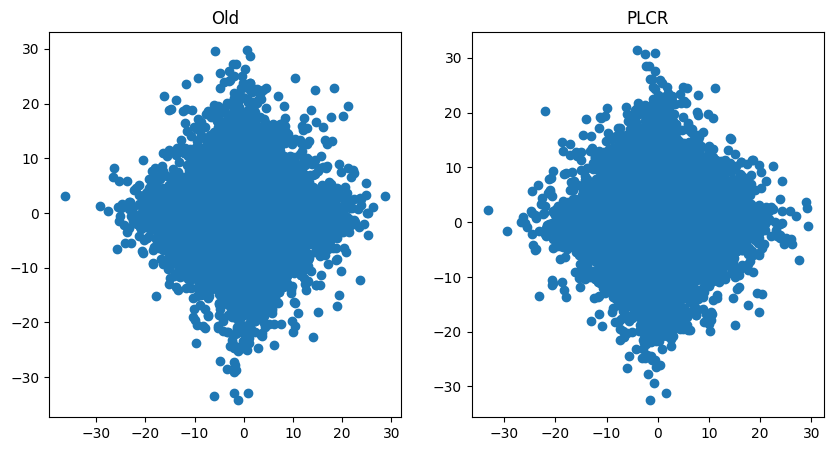

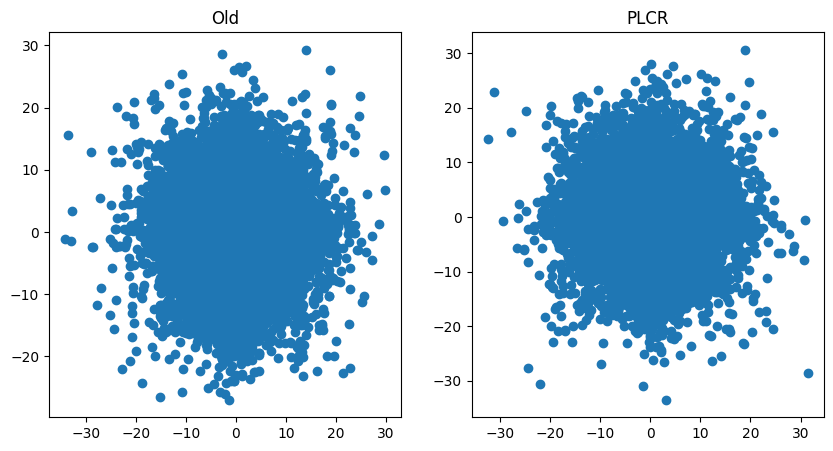

In [15]:
for i in range(7):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].scatter(x_train_old[:, i], x_train_old[:, i+1])
    ax[0].set_title("Old")
    ax[1].scatter(x_train[:, i], x_train[:, i+1])
    ax[1].set_title("PLCR")
    plt.show()

In [40]:
from tasks.toy_examples.data_generators import Conjugate_GammaPrior

gamma = Conjugate_GammaPrior(alpha = 0.5, beta = 0.5)

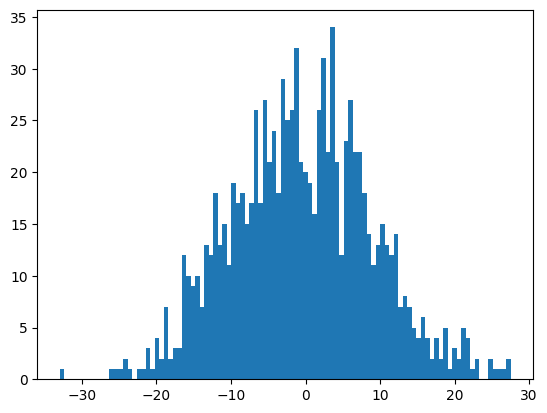

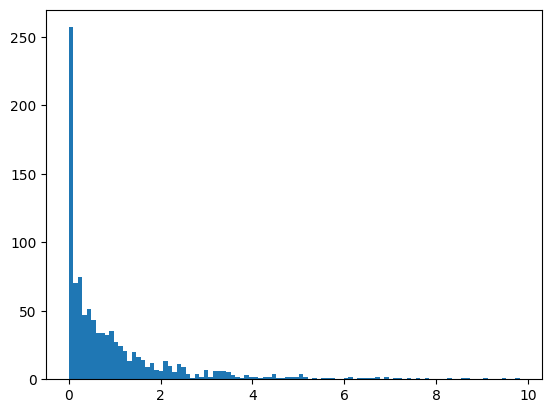

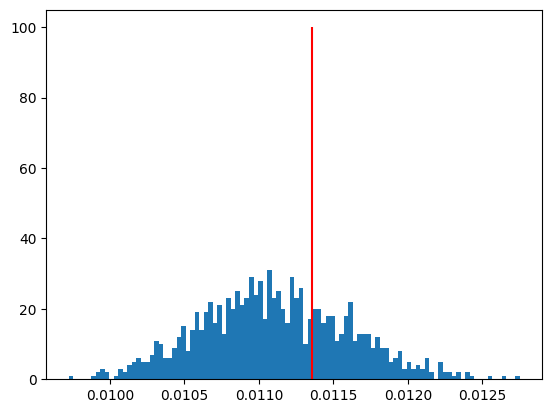

In [41]:
true_theta = gamma.prior.sample((1,))

# simulator
xs = [gamma.simulator(true_theta[0]) for _ in range(1000)]
xs = torch.stack(xs)
import matplotlib.pyplot as plt
plt.hist(xs, bins=100)
plt.show()

# prior
samples = gamma.prior.sample((1000,))
import matplotlib.pyplot as plt
plt.hist(samples, bins=100)
plt.show()

# posterior
x_obs = xs[:1000]
posterior = gamma.true_posterior(x_obs).sample((1000,))
import matplotlib.pyplot as plt
plt.hist(posterior, bins=100)
plt.vlines(true_theta, 0, 100, color='r')
plt.show()

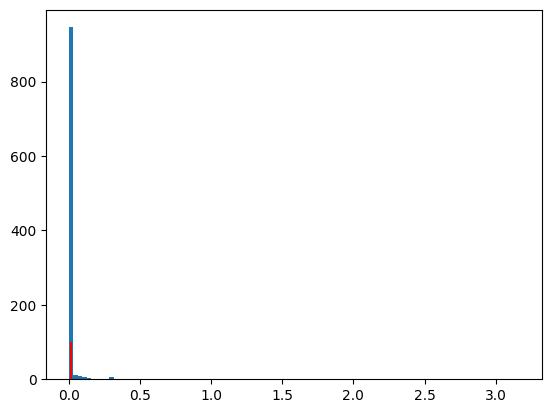

In [27]:
# diffused posterior
from nse import NSE
nse = NSE(1, 1)
t = torch.tensor([0.8])
alpha_t = nse.alpha(t)
posterior_0 = gamma.true_posterior(x_obs)
diffused_posterior = torch.distributions.Gamma(
    posterior_0.concentration * alpha_t[0],
    posterior_0.rate * alpha_t[0],
)
diffused_samples = diffused_posterior.sample((1000,))
import matplotlib.pyplot as plt
plt.hist(diffused_samples, bins=100)
plt.vlines(true_theta, 0, 100, color='r')
plt.show()